In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1000x_1^2 + 40x_1 x_2 +  x_2^2$. 

$\textbf{Question 1:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$

The matrix Q is the hessian matrix.

$Q = Hessian = \nabla^2f(x) = \begin{bmatrix} \frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1 x_2} \\  \frac{\partial^2f}{\partial x_1 x_2} & \frac{\partial^2f}{\partial x_2^2}  \end{bmatrix}  = \begin{bmatrix} 2000 & 40 \\ 40 & 2 \end{bmatrix}$

*Note : Here the the function f(x) is a quadratic function, so when we calculate the hessian matric which is the $\nabla^2f(x)$, x terms vanishes and we are only left with the coefficients.* ***So the hessian matrix does not depend of x and is constant and same for all values of x.***

$\\ \\ $

Also we see that the condition number is given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$

$\\ \\ $

Here we have $\lambda_{\max} = 2000.8 \ \ (approx) and \ \ \lambda_{\min} = 1.199 \ (approx)$

$\\ \\$

Hence the condition number is $\frac{2000.8}{1.199} = 1668.001$

$\textbf{Question 5:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$ 

We will choose the diagonal matrix $D^k$ as by choosing the diagonals elements from the hessian matrix and inversing them. In general, 

$(\frac{\partial^2f(x_k)}{(\partial x^i)^2})^{-1}  \ \ \ \ \ for \ \  i = 1,2,....,n$

$Hence, \ \ D^k = \begin{bmatrix} \frac{1}{2000} & 0 \\ 0 & \frac{1}{2} \end{bmatrix}$

Note : Since the $D^k$ matrix depend on the hessian matrix $Q$, and from above we already know that the Q matrix is independent of x. So our $D^k$ matrix is also constant and same for all values of .

# General Code for evalf,evalg, compute D, condition number, finding step length and find_minimizer

In [ ]:
import numpy as np 

#method to find Hessian matrix
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([
                   [2000, 40],
                   [40,2]
                   ])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]

  return np.linalg.eig(A)[0][0] / np.linalg.eig(A)[0][1]




In [ ]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  return np.array([
                   [1/(evalh(x)[0][0]),0],
                   [0, 1/(evalh(x)[1][1])]
                   ])
  


In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return 1000*(x[0]**2) + 40*x[0]*x[1] + x[1]**2
  


In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2000*x[0] + 40*x[1], 40*x[0] + 2*x[1] ])
  

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  step_length = (np.dot(gradf.T, gradf)) / (np.matmul(gradf.T,np.matmul(2*A,gradf)))
  return step_length
  

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  p = -gradf

  while (evalf(x + alpha*p) > (evalf(x) + gamma * alpha * np.dot(gradf.T, p)) ):
    alpha = alpha*rho
  
  return alpha
  
  

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  p = -gradf

  while (evalf(x + alpha*np.matmul(direction,p)) > (evalf(x) + gamma * alpha * np.matmul(gradf.T, np.matmul(direction, p))) ):
    alpha = alpha*rho
  
  return alpha
  
  
  
  #Complete the code 

In [ ]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  A = np.array([[1000, 20],[20, 2]])
  x = start_x
  g_x = evalg(x)
  k = 0

  if (line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2] 

  while np.linalg.norm(g_x) > tol:

    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x,A)

    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = float(input('Enter a valid value for the constant step length.'))

    else:  
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, np.multiply(step_length,g_x)) 
    k += 1 
    g_x = evalg(x)

  return x, k



In [ ]:
#complete the code for gradient descent with scaling to find the minimizer
 
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
 
  x = start_x
  g_x = evalg(x)
  k = 0
  
 
  if (line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2] 
 
  while np.linalg.norm(g_x) > tol:
 
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = #step_length using exact line search with sclaing
 
    d = compute_D_k(x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x, d , alpha_start,rho, gamma)
 
    #elif line_search_type == CONSTANT_STEP_LENGTH: 
      #step_length = float(input('Enter a valid value for the constant step length.'))
 
    else:  
      raise ValueError('Line search type unknown. Please check!')
 
    x = np.subtract(x, step_length * np.matmul(d,g_x)) 
    k += 1 
    g_x = evalg(x)
 
  return x, k
 
  #Complete the code

# ***Part 7:*** *Minimizer and the minimum value for the function (Using scaling and backtracing approach)*

In [ ]:
my_start_x = np.array([1.,2000.])
my_tol= 1e-9
alpha = 1.0
rho = 0.5
gamma = 0.5

x, k = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha, rho, gamma)

print('Optimal X :', x)
print('The optimal value of f(x) : ', evalf(x))





Optimal X : [-1.44991408e-12  5.09130136e-11]
The optimal value of f(x) :  1.7416059877853944e-21


# ***Part 8:*** *Minimizer and the minimum value for the function using ELS(without scaling), BLS (with and without scaling)*

In [ ]:


my_start_x = np.array([1.,2000.])
my_tol= 10e-9
alpha = 1.0
rho = 0.5
gamma = 0.5

x_els, k_els = find_minimizer_gd(my_start_x,my_tol,EXACT_LINE_SEARCH)
x_bls, k_bls = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha, rho, gamma)
x_bls_scaling, k_bls_scaling = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha, rho, gamma)

df = pd.DataFrame(columns=['Method', 'Optimal X', 'Optimal f(x)', 'Iterations'])

df['Method'] = ['ELS without Scaling', 'BLS without Scaling', 'BLS with Scaling']
df['Optimal X'] = [x_els, x_bls, x_bls_scaling]
df['Optimal f(x)'] = [evalf(x_els), evalf(x_bls), evalf(x_bls_scaling)]
df['Iterations'] = [k_els, k_bls, k_bls_scaling]
df




,Method,Optimal X,Optimal f(x),Iterations
0,ELS without Scaling,"[-1.2355943843000838e-10, 6.0016200679154866e-09]",2.162411e-17,20847
1,BLS without Scaling,"[-1.226531099775065e-10, 6.0437262240152715e-09]",2.191914e-17,500
2,BLS with Scaling,"[-9.06196302620983e-12, 3.1820633527148966e-10]",6.803148e-20,64



# ***Part 9:*** *Behavior of the backtracking linesearch algorithms (with and without scaling) for different choices of $\alpha^0$*

$\alpha^0 \in {\{ 1.0,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01 \}}$

$x^0 = (1.0, 2000.0)$

$\tau = 10^{-9} $

$\rho \ =\ 0.5\\$

$\gamma \ =\ 0.5\ $



,alpha,X_bls,f(X_bls),Iterations_bls,X_bls_scaling,f(X_bls_scaling),Iterations_bls_scaling
0,1.00,"[-1.6174254708034478e-10, 8.07451047758225e-09]",3.911870e-17,358,"[6.953557824660044e-12, -2.4499581972895506e-10]",4.023121e-20,59
1,0.90,"[-1.6276152783169156e-10, 8.171995924844584e-09]",4.006937e-17,4315,"[1.1559542784907062e-11, -3.6554483909406126e-10]",9.822481e-20,66
2,0.75,"[-1.5015145572497233e-10, 7.597626810835278e-09]",3.463760e-17,13484,"[1.1236933689329938e-11, -3.553430437456151e-10]",9.281871e-20,82
3,0.60,"[-1.6232228357831127e-10, 8.069568553689346e-09]",3.907163e-17,6377,"[1.3530536355111157e-11, -4.278731284586411e-10]",1.345767e-19,104
4,0.50,"[-1.6174254708034478e-10, 8.07451047758225e-09]",3.911870e-17,358,"[1.2469217620070448e-11, -3.9431128319726707e-10]",1.142926e-19,128
5,0.40,"[-1.5752986305755104e-10, 7.943996248268485e-09]",3.786607e-17,12007,"[1.3402952883574604e-11, -4.238385848401733e-10]",1.320507e-19,163
6,0.25,"[-1.6174254708034478e-10, 8.07451047758225e-09]",3.911870e-17,358,"[1.3296255099232803e-11, -4.204645046420379e-10]",1.299567e-19,269
7,0.10,"[-1.5752986305755104e-10, 7.943996248268485e-09]",3.786607e-17,12007,"[1.3489548667811633e-11, -4.265769839797486e-10]",1.337626e-19,692
8,0.01,"[-1.5066121280357593e-10, 7.59291760378315e-09]",3.459287e-17,10371,"[1.35597853056118e-11, -4.2879806148615606e-10]",1.351592e-19,7036


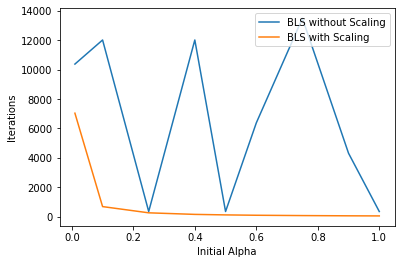

In [ ]:
my_start_x = np.array([5,5])
my_tol= 10e-9

alpha_arr = [1.0,0.9,0.75, 0.6,0.5,0.4,0.25,0.1,0.01]
rho_ = 0.5
gamma_ = 0.5

x_arr_bls = []
iter_bls = []

x_arr_bls_scaling = []
iter_bls_scaling = []

for i in alpha_arr:

  x, k = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,i, rho_, gamma_)
  x_arr_bls.append(x)
  iter_bls.append(k)

  x, k = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,i, rho, gamma)
  x_arr_bls_scaling.append(x)
  iter_bls_scaling.append(k)

  


df = pd.DataFrame(columns=['alpha', 'X_bls', 'f(X_bls)','Iterations_bls', 'X_bls_scaling', 'f(X_bls_scaling)', 'Iterations_bls_scaling'])

df['alpha'] = alpha_arr
df['X_bls'] = x_arr_bls
df['f(X_bls)'] = df['X_bls'].apply(evalf)
df['Iterations_bls'] = iter_bls
df['X_bls_scaling'] = x_arr_bls_scaling
df['f(X_bls_scaling)'] = df['X_bls_scaling'].apply(evalf)
df['Iterations_bls_scaling'] = iter_bls_scaling




display(df)

print('\n\n')
plt.plot(alpha_arr, iter_bls, label='BLS without Scaling')
plt.plot(alpha_arr, iter_bls_scaling, label='BLS with Scaling')
plt.xlabel('Initial Alpha')
plt.ylabel('Iterations')
plt.legend()
plt.show()






***Remarks :*** *We observe that the number of iteration does not follow a certain pattern in this graph. In BLS with scaling, the graph is pretty neat. The number of iteration in BLS with scaling decreasesa as we increase the initial value of alpha, but similar trend can not be said of the BLS without scaling in which we observe regulaar spikes at certain points


# ***Part 10:*** *Behavior of the backtracking linesearch algorithms (with and without scaling) for different choices of $\rho$*

$\rho \in {\{0.9,0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01 \}}$

$x^0 = (1.0, 2000.0)$

$\tau = 10^{-9} $

$\alpha = 1$

$\rho \ =\ 0.5\\$

$\gamma \ =\ 0.5\ $



,Rho,X_bls,f(X_bls),Iterations_bls,X_bls_scaling,f(X_bls_scaling),Iterations_bls_scaling
0,0.90,"[-1.5604883407012962e-10, 7.734135248456346e-09]",3.589198e-17,1423,"[-1.0703764753944118e-11, 3.722599993271974e-10]",9.376475e-20,63
1,0.80,"[-1.481247552045219e-10, 7.3832367807387645e-09]",3.270752e-17,448,"[-5.7623016800250184e-11, 2.783613680722769e-09]",4.652908e-18,59
2,0.75,"[-1.623186592196918e-10, 8.158420745095756e-09]",3.993662e-17,13462,"[-1.0174532278155418e-11, 3.9833437984166556e-10]",1.000767e-19,63
3,0.60,"[-1.6326463712982266e-10, 8.120557552797777e-09]",3.956680e-17,3036,"[-1.0883579003488633e-11, 3.6340085825207773e-10]",9.230840e-20,63
4,0.50,"[-1.226531099775065e-10, 6.0437262240152715e-09]",2.191914e-17,500,"[-9.06196302620983e-12, 3.1820633527148966e-10]",6.803148e-20,64
5,0.40,"[-1.6224872908094246e-10, 8.0433170741879e-09]",3.881888e-17,13574,"[-2.1647254170498173e-11, 9.666093894623808e-10]",5.659598e-19,62
6,0.25,"[-1.5395449932790527e-10, 7.77892209660908e-09]",3.630961e-17,20456,"[-4.9643629052467643e-11, 2.2885491866445917e-09]",3.157472e-18,62
7,0.10,"[-1.1722819673664532e-10, 6.030325521324538e-09]",2.183031e-17,22294,"[-1.1595845202694586e-10, 5.728038124488406e-09]",1.968821e-17,67
8,0.01,"[-1.622825602303143e-10, 8.154854594558656e-09]",3.990166e-17,27388,"[-1.1204911284477063e-10, 5.574456261356004e-09]",1.864505e-17,176


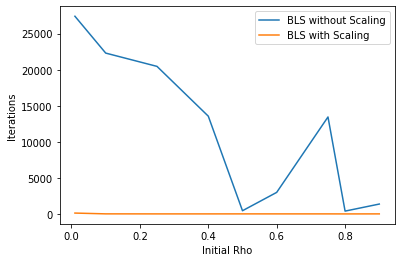

In [ ]:
my_start_x = np.array([1.0, 2000.0])
my_tol= 10e-9

rho_arr = [0.9,0.8,0.75, 0.6,0.5,0.4,0.25,0.1,0.01]
alpha = 1.0
gamma_ = 0.5

x_arr_bls = []
iter_bls = []

x_arr_bls_scaling = []
iter_bls_scaling = []

for i in rho_arr:

  x, k = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha ,i, gamma_)
  x_arr_bls.append(x)
  iter_bls.append(k)

  x, k = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,i, gamma)
  x_arr_bls_scaling.append(x)
  iter_bls_scaling.append(k)

  

df = pd.DataFrame(columns=['Rho', 'X_bls', 'f(X_bls)','Iterations_bls', 'X_bls_scaling', 'f(X_bls_scaling)', 'Iterations_bls_scaling'])

df['Rho'] = rho_arr
df['X_bls'] = x_arr_bls
df['f(X_bls)'] = df['X_bls'].apply(evalf)
df['Iterations_bls'] = iter_bls
df['X_bls_scaling'] = x_arr_bls_scaling
df['f(X_bls_scaling)'] = df['X_bls_scaling'].apply(evalf)
df['Iterations_bls_scaling'] = iter_bls_scaling


display(df)

print('\n\n')
plt.plot(rho_arr, iter_bls, label='BLS without Scaling')
plt.plot(rho_arr, iter_bls_scaling, label='BLS with Scaling')
plt.xlabel('Initial Rho')
plt.ylabel('Iterations')
plt.legend()
plt.show()


***Remarks :*** *We observe that in BLS with scaling the number of iterations taken to perform the task is very low compared to BLS wihtout scaling. As we can see from the graph for BLS without scaling, the number of itertions decreases as we increase pho but there is a spike in iteration when $\rho$ is around 0.75. In BLS with scaling the number has very less variance and lie 60-70, except for the case when $\rho$ is very low.*